<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/vision/CNN_1_Kaggle_TransferLearning_ResNet50_Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 在 進階 CNN 講義中我們有提到 CNN個神經層間的 “合作” 特性，從淺層的點、線斷等元素整理到深層的打理抽象零件或物件。如果有強大的 CNN 模型，經過適當豐足的資料訓練，很多淺層的 “整理” 可以提供其他工作參考。
1. 這裡我們要來作 50層的 resnet 

*   [from JK Jung](https://github.com/jkjung-avt/keras-cats-dogs-tutorial)
*   [ref. JK Jung](https://jkjung-avt.github.io/keras-tutorial/)
*   [ref. GT Wang](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)


./catsdogs/sample/

           ├── train/

           │   ├── cats/

           │   │   ├── cat.0.jpg

           │   │   │   ...

           │   │   └── cat.999.jpg

           │   └── dogs/

           │       ├── dog.0.jpg

           │       │   ...

           │       └── dog.999.jpg

           └── valid/

               ├── cats/

               │   ├── cat.1000.jpg

               │   │   ...

               │   └── cat.1399.jpg

               └── dogs/

                   ├── dog.1000.jpg

                   │   ...
                   
                   └── dog.1399.jpg

# 說明
1. 請將 **cd_aug.zip** 放在同 COLAB 帳號的雲端硬碟根目錄底下
2.然後執行下列程式。

In [ ]:
import json
import os
import os.path
from IPython.display import clear_output as clear

api_token = {"username":"your name","key":"your key"}
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
os.chdir('/content')
!kaggle competitions download -c dogs-vs-cats
 
!unzip dogs-vs-cats.zip
!unzip train.zip 
!unzip test1.zip
clear()

串流輸出內容已截斷至最後 5000 行。
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg  

In [ ]:
!mkdir catsdogs
clear()
!mkdir catsdogs/sample
clear()
!mkdir catsdogs/sample/train
clear()
!mkdir catsdogs/sample/train/cats
clear()
!mkdir catsdogs/sample/train/dogs
clear()
!mkdir catsdogs/sample/valid
clear()
!mkdir catsdogs/sample/valid/cats
clear()
!mkdir catsdogs/sample/valid/dogs

!cp train/cat.?.jpg train/cat.??.jpg train/cat.???.jpg catsdogs/sample/train/cats/
!cp train/dog.?.jpg train/dog.??.jpg train/dog.???.jpg catsdogs/sample/train/dogs/
!cp train/cat.1[0-3]??.jpg catsdogs/sample/valid/cats/
!cp train/dog.1[0-3]??.jpg catsdogs/sample/valid/dogs/
clear()

In [ ]:
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
print('tf version is ', tf.__version__)

import os
x = os.listdir('./catsdogs/sample/valid/cats')
print(f'we have {len(x)} files under ./catsdogs/sample/trian/dogs')

tf version is  2.8.0
we have 400 files under ./catsdogs/sample/trian/dogs


In [ ]:
"""
This script goes along my blog post:
Keras Cats Dogs Tutorial (https://jkjung-avt.github.io/keras-tutorial/)
"""

#%tensorflow_version 1.x
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input,ResNet50 ###
#from tensorflow.python.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from keras_applications.resnet import ResNet50, preprocess_input




In [ ]:
DATASET_PATH  = './catsdogs/sample'
IMAGE_SIZE    = (112, 112) #(224, 224)
NUM_CLASSES   = 2
BATCH_SIZE    = 8  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 2  # freeze the first this many layers for training
NUM_EPOCHS    = 20
WEIGHTS_FINAL = 'model-resnet50-final.h5'

# [ImageDataGenerator]
### 我們採用的工具是 ImageDataGenerator
#### 所以需要 
```
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
```
* ### 用法就是開一個物件繼承 ImageDataGenerator，可以設定 ImageDataGenerator 的特性。 ie. train_datagen or valid_datagen

* ### 然後就是讓我們現在的物件 train_datagen 開始產生資料，我們用的方法是: 從目錄來長資料。

* ### 採用 ImageDataGenerator 來完成資料，訓練時需要用到 model.fit_generator




# 觀察 Data-Augmentation 

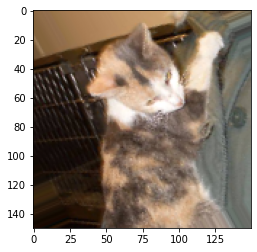

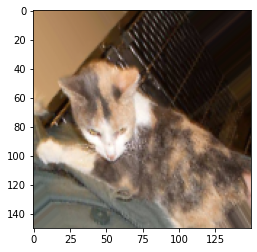

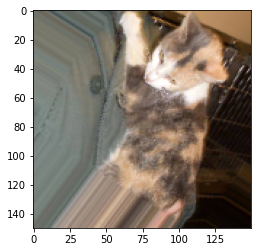

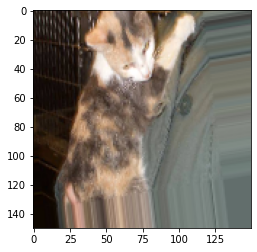

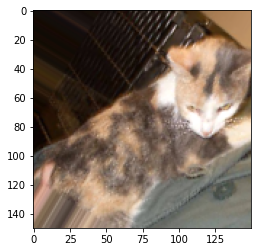

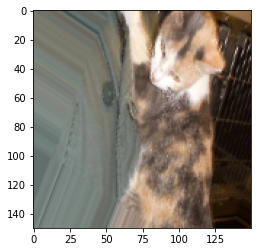

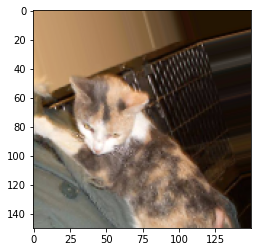

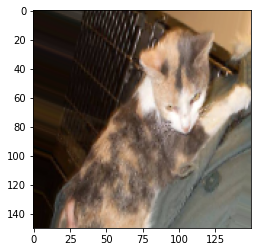

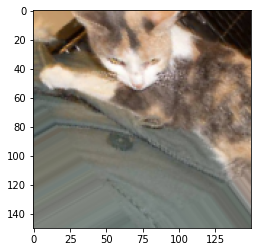

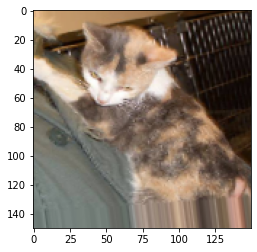

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

datagen_view = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


# 取得訓練資料集中貓的檔案列表
fnames = [os.path.join('catsdogs/sample/train/cats', fname) for fname in os.listdir('catsdogs/sample/train/cats')]

# 取一個圖像
img_path = fnames[3]

# 讀圖像並進行大小處理
img = image.load_img(img_path, target_size=(150, 150))

# 轉換成Numpy array並且shape (150, 150, 3)
x = image.img_to_array(img)

# 重新Reshape成 (1, 150, 150, 3)以便輸入到模型中
x = x.reshape((1,) + x.shape)

# 透過flow()方法將會隨機產生新的圖像
# 它會無限循環，所以我們需要在某個時候“斷開”循環
i = 0
for batch in datagen_view.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=IMAGE_SIZE,  #(112, 112)
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/valid',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

'''
DATASET_PATH  = './catsdogs/sample'
IMAGE_SIZE    = (112, 112) #(224, 224)
NUM_CLASSES   = 2
BATCH_SIZE    = 8  # try reducing batch size or freeze more layers if your GPU runs out of memory
FREEZE_LAYERS = 2  # freeze the first this many layers for training
NUM_EPOCHS    = 20
WEIGHTS_FINAL = 'model-resnet50-final.h5'
'''

# show class indices
print('****************')
for cls, idx in train_batches.class_indices.items():
    #print('Class #{} = {}'.format(idx, cls))
    print(f'Class #{idx} = {cls}')
print('****************')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
****************
Class #0 = cats
Class #1 = dogs
****************


# 自編寫 CNN

In [ ]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3)))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid')) # notice!
model_CNN.add(Dense(NUM_CLASSES, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/20
250/250 [==============================] - 33s 87ms/step - loss: 1.9383 - accuracy: 0.5440 - val_loss: 1.7448 - val_accuracy: 0.5300
Epoch 2/20
250/250 [==============================] - 22s 88ms/step - loss: 1.4455 - accuracy: 0.5695 - val_loss: 1.6736 - val_accuracy: 0.5437
Epoch 3/20
250/250 [==============================] - 23s 93ms/step - loss: 1.2493 - accuracy: 0.5820 - val_loss: 1.3265 - val_accuracy: 0.5688
Epoch 4/20
250/250 [==============================] - 23s 93ms/step - loss: 1.1091 - accuracy: 0.5920 - val_loss: 1.0260 - val_accuracy: 0.6000
Epoch 5/20
250/250 [==============================] - 22s 89ms/step - loss: 1.1388 - accuracy: 0.5860 - val_loss: 1.1279 - val_accuracy: 0.5800
Epoch 6/20
250/250 [==============================] - 22s 88ms/step - loss: 1.0533 - accuracy: 0.5900 - val_loss: 0.9873 - val_accuracy: 0.5888
Epoch 7/20
250/250 [==============================] - 22s 89ms/step - loss: 0.9325 - accuracy: 0.6015 - val_loss: 0.9098 - val_accuracy:

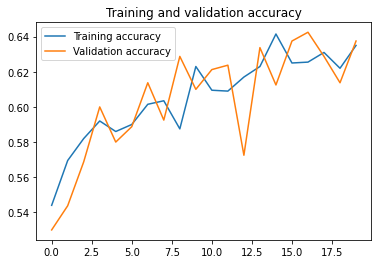

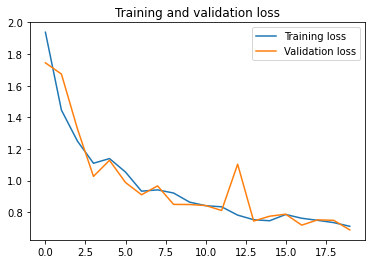

In [ ]:



model_CNN.compile(loss='categorical_crossentropy',
               optimizer= Adam(learning_rate=1e-5),
               #optimizer= 'adam', 
               metrics=['accuracy'])
              

history_CNN = model_CNN.fit_generator(
      train_batches,
      steps_per_epoch = train_batches.samples // BATCH_SIZE,
      validation_data = valid_batches,
      validation_steps = valid_batches.samples // BATCH_SIZE,
      epochs = NUM_EPOCHS)


import matplotlib.pyplot as plt

acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#



```
- input_shape 輸入確定
  IMAGE_SIZE    = (112, 112)
  IMAGE_SIZE[0]
- include_top: 輸出確定
  include_top: whether to include the 3 fully-connected layers at the top of the network.

前面的基本層次，常常是很能共用的，很保留先前大量資料萃取出來的資訊
- for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True
```







In [ ]:
print(tf.__version__)

2.8.0


# 採用 ResNet 50 + Imagenet

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=IMAGE_SIZE,  #(112, 112)
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/valid',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

# show class indices
print('****************')
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))
print('****************')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
****************
Class #0 = cats
Class #1 = dogs
****************


In [ ]:
IMAGE_SIZE

(112, 112)

In [ ]:
# build our classifier model based on pre-trained ResNet50:
# 1. we don't include the top (fully connected) layers (ie. clf portion) of ResNet50
# 2. we add a DropOut layer followed by a Dense (fully connected)
#    layer which generates softmax class score for each class
# 3. we compile the final model using an Adam optimizer, with a
#    low learning rate (since we are 'fine-tuning')
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))

x = net.output
print(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])
print(net_final.summary())

# train the model
history_r50= net_final.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        epochs = NUM_EPOCHS)

# save trained weights
net_final.save(WEIGHTS_FINAL)

94781440/94765736 [==============================] - 1s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 118, 118, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 56, 56, 64)   94

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2_block3_1_bn (BatchNormal  (None, 28, 28, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 28, 28, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 28, 28, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 28, 28, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
250/250 [==============================] - 57s 152ms/step - loss: 1.2947 - accuracy: 0.5880 - val_loss: 0.5642 - val_accuracy: 0.8138
Epoch 2/20
250/250 [==============================] - 36s 146ms/step - loss: 0.8501 - accuracy: 0.7190 - val_loss: 0.6075 - val_accuracy: 0.8637
Epoch 3/20
250/250 [==============================] - 37s 146ms/step - loss: 0.7263 - accuracy: 0.7745 - val_loss: 0.6416 - val_accuracy: 0.8988
Epoch 4/20
250/250 [==============================] - 37s 146ms/step - loss: 0.6264 - accuracy: 0.8045 - val_loss: 0.5067 - val_accuracy: 0.9150
Epoch 5/20
250/250 [==============================] - 38s 153ms/step - loss: 0.5493 - accuracy: 0.8310 - val_loss: 0.5363 - val_accuracy: 0.9125
Epoch 6/20
250/250 [==============================] - 37s 147ms/step - loss: 0.5204 - accuracy: 0.8320 - val_loss: 0.5388 - val_accuracy: 0.9250
Epoch 7/20
250/250 [==============================] - 36s 145ms/step - loss: 0.5438 - accuracy: 0.8395 - val_loss: 0.5448 - val_ac

『練習 20 分鐘』（其實跑 10 epochs 可能就耗掉 10分鐘了）
1. 觀察 accuracy and loss for training and validation
1. 照片設為 56, 56重 train 網路

In [ ]:
#history_r50.history

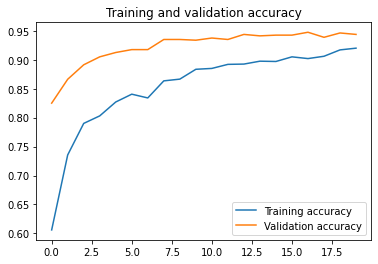

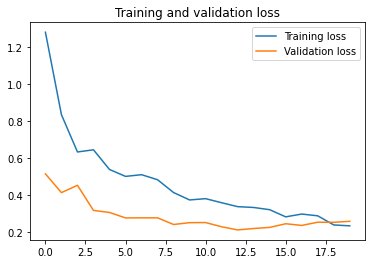

In [ ]:
import matplotlib.pyplot as plt

acc = history_r50.history['accuracy']
val_acc = history_r50.history['val_accuracy']
loss = history_r50.history['loss']
val_loss = history_r50.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()